In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%qtconsole --colors=linux
plt.style.use('ggplot')

from matplotlib import gridspec
from theano import tensor as tt
from scipy import stats

# Chapter 8 - Comparing Gaussian means
## 8.1 One-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 63.553:   5%|▍         | 9116/200000 [00:00<00:16, 11481.38it/s]
Convergence archived at 9500
Interrupted at 9,500 [4%]: Average Loss = 71.606
100%|██████████| 3500/3500.0 [00:03<00:00, 975.54it/s] 


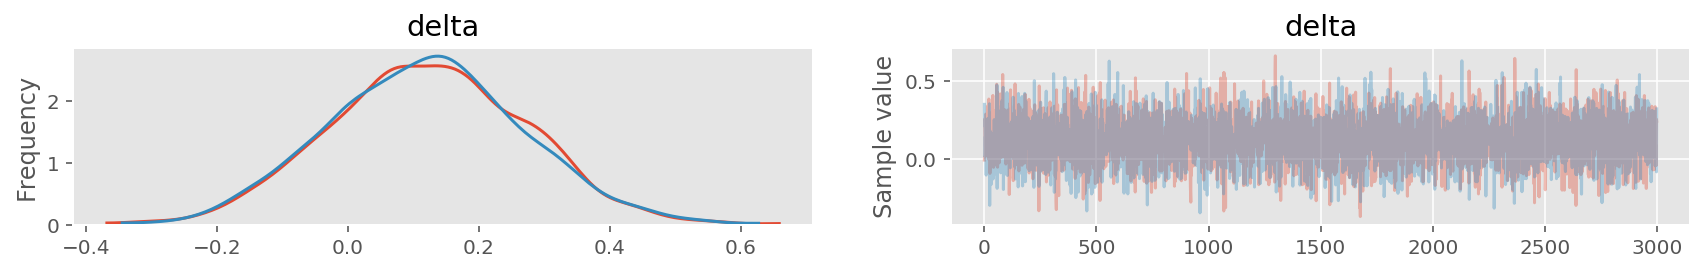

In [2]:
# Read data Dr. Smith
Winter = np.array([-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,
            0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,0.17,0.17,
            0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,
            0.04,0.25,0.12])

Summer = np.array([0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,
            -0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,0.00,0.00,
            0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,
            0.00,0.50,0.00])
x = Winter - Summer  # allowed because it is a within-subjects design
x = x / np.std(x)  

with pm.Model() as model1:
    delta = pm.Cauchy('delta', alpha=0, beta=1)
    sigma = pm.HalfCauchy('sigma', beta=1)
    miu = delta*sigma
    xi = pm.Normal('xi', mu=miu, sd=sigma, observed=x)
    trace1=pm.sample(3e3, njobs=2)

burnin=0    
pm.traceplot(trace1[burnin:], varnames=['delta']);
plt.show()

In [3]:
def display_delta(trace, x):
    # BFs based on density estimation (using kernel smoothing instead of spline)
    from scipy.stats.kde import gaussian_kde
    from scipy.stats import cauchy

    pm.summary(trace, varnames=['delta'])
    tmp = pm.df_summary(trace, varnames=['delta'])
    # 95% confidence interval:
    x0 = tmp.values[0, 3]
    x1 = tmp.values[0, 4]

    t_delt = trace['delta'][:]
    my_pdf = gaussian_kde(t_delt)
    plt.plot(x, my_pdf(x), '--', lw=2.5, alpha=0.6, label='Posterior') # distribution function
    plt.plot(x, cauchy.pdf(x), 'r-', lw=2.5, alpha=0.6, label='Prior')
    posterior = my_pdf(0)             # this gives the pdf at point delta = 0
    prior     = cauchy.pdf(0)         # height of order-restricted prior at delta = 0
    BF01      = posterior/prior
    print ('the Bayes Factor is %.5f' %(BF01))
    plt.plot([0, 0], [posterior, prior], 'k-', 
             [0, 0], [posterior, prior], 'ko', lw=1.5, alpha=1)
    plt.xlabel('Delta')
    plt.ylabel('Density')
    plt.legend(loc='upper left')
    plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.120            0.148            0.002            [-0.181, 0.395]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.164         0.018          0.120          0.218          0.418

the Bayes Factor is 6.01183


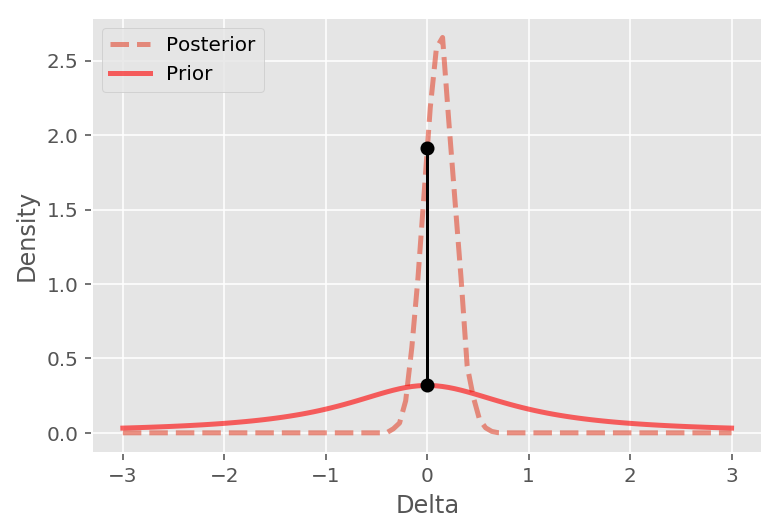

In [4]:
x = np.linspace(-3, 3, 100)
display_delta(trace1, x)

## 8.2 Order-restricted one-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)_{\mathcal I(-∞,0)}$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 64.142:   5%|▌         | 10738/200000 [00:01<00:17, 10862.76it/s]
Convergence archived at 11500
Interrupted at 11,500 [5%]: Average Loss = 78.56
100%|██████████| 3500/3500.0 [00:04<00:00, 716.97it/s]


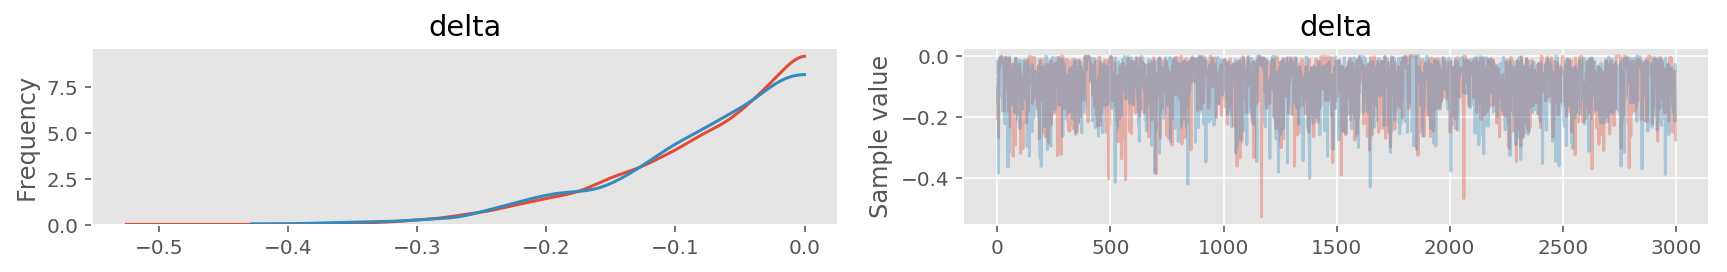

In [5]:
# Read data Dr. Smith
Winter = np.array([-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,
            0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,0.17,0.17,
            0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,
            0.04,0.25,0.12])

Summer = np.array([0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,
            -0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,0.00,0.00,
            0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,
            0.00,0.50,0.00])
x = Winter - Summer  # allowed because it is a within-subjects design
x = x / np.std(x)  

with pm.Model() as model2:
    delta1 = pm.HalfCauchy('delta1', beta=1)
    delta = pm.Deterministic('delta', -delta1)
    sigma = pm.HalfCauchy('sigma', beta=1)
    miu = delta*sigma
    xi = pm.Normal('xi', mu=miu, sd=sigma, observed=x)
    trace2=pm.sample(3e3, njobs=2)

burnin=0
pm.traceplot(trace2[burnin:], varnames=['delta']);
plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.087           0.073            0.002            [-0.229, -0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.263         -0.125         -0.068         -0.029         -0.003

the Bayes Factor is 13.79170


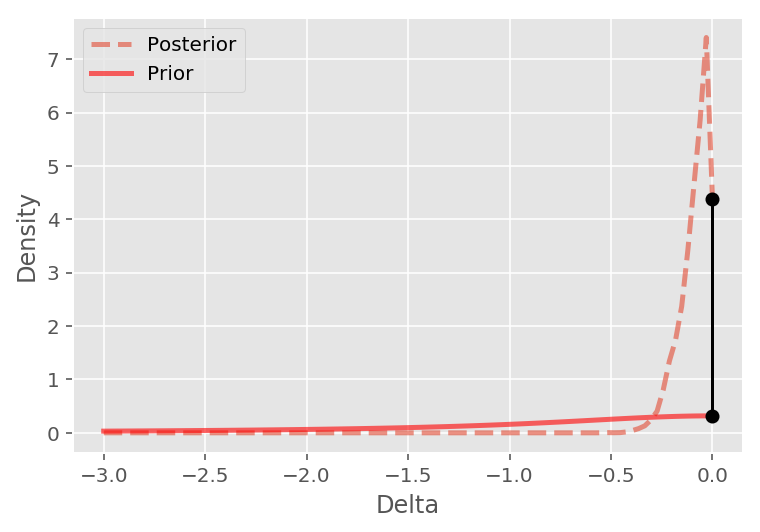

In [6]:
x = np.linspace(-3, 0, 100)
display_delta(trace2, x)

## 8.3 Two-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \mu \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \alpha = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu+\frac{\alpha}{2},1/\sigma^2)$$
$$ y_{i} \sim \text{Gaussian}(\mu-\frac{\alpha}{2},1/\sigma^2)$$


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 75.961:   4%|▍         | 8167/200000 [00:00<00:21, 8978.08it/s]
Convergence archived at 8700
Interrupted at 8,700 [4%]: Average Loss = 97.848
100%|██████████| 3500/3500.0 [00:05<00:00, 621.23it/s]


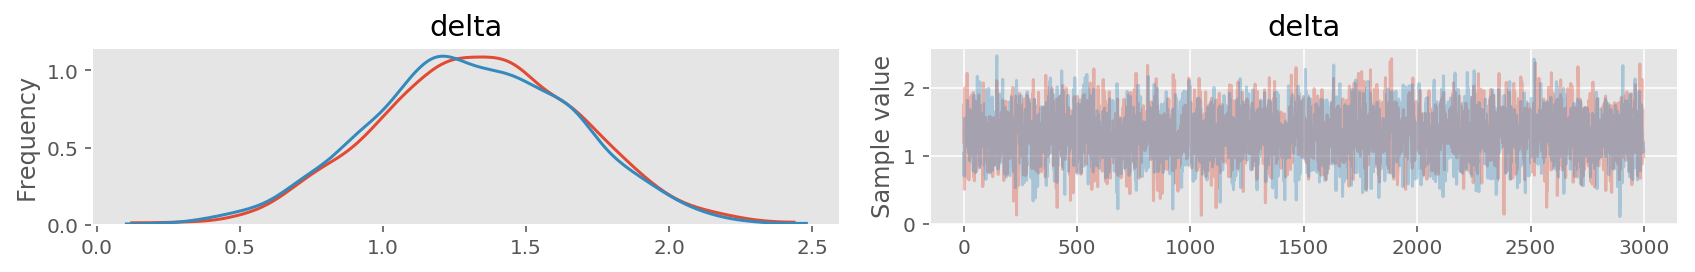

In [7]:
# Read data 
x =np.array([70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77])
y =np.array([56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71])

n1 = len(x)
n2 = len(y)

# Rescale
y = y - np.mean(x)
y = y / np.std(x)
x = (x - np.mean(x)) / np.std(x)

with pm.Model() as model3:
    delta = pm.Cauchy('delta', alpha=0, beta=1)
    mu = pm.Cauchy('mu', alpha=0, beta=1)
    sigma = pm.HalfCauchy('sigma', beta=1)
    alpha = delta*sigma
    xi = pm.Normal('xi', mu=mu+alpha/2, sd=sigma, observed=x)
    yi = pm.Normal('yi', mu=mu-alpha/2, sd=sigma, observed=y)
    trace3=pm.sample(3e3, njobs=2)

burnin=0    
pm.traceplot(trace3[burnin:], varnames=['delta']);
plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.321            0.352            0.006            [0.652, 2.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.645          1.083          1.320          1.569          1.996

the Bayes Factor is 0.00207


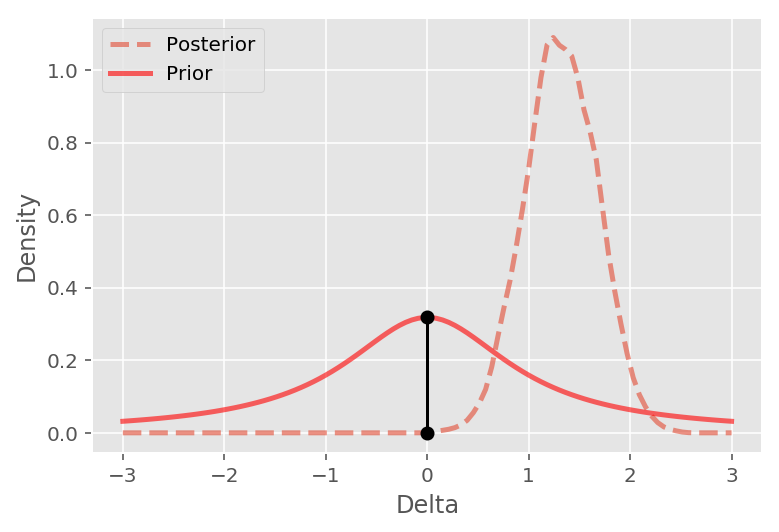

In [8]:
x = np.linspace(-3, 3, 100)
display_delta(trace3, x)